In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data=pd.read_csv(r"C:\Users\Saikiran\Desktop\train.csv")

In [3]:
train_data


,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [4]:
print(train_data.head())  # Display the first few rows of the dataset


      x          y
0  24.0  21.549452
1  50.0  47.464463
2  15.0  17.218656
3  38.0  36.586398
4  87.0  87.288984


In [5]:
print(train_data.info())  # Display information about the dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB
None


In [6]:
print(train_data.describe())  # Display summary statistics of numerical features


                 x           y
count   700.000000  699.000000
mean     54.985939   49.939869
std     134.681703   29.109217
min       0.000000   -3.839981
25%      25.000000   24.929968
50%      49.000000   48.973020
75%      75.000000   74.929911
max    3530.157369  108.871618


In [7]:
train_data.mean()

x    54.985939
y    49.939869
dtype: float64

In [8]:
train_data.median()

x    49.00000
y    48.97302
dtype: float64

In [9]:
train_data.mode()

,x,y
0,58.0,-3.839981
1,NaN,-3.836652
2,NaN,-2.830750
3,NaN,-2.235880
4,NaN,-1.286311
...,...,...
694,NaN,101.622855
695,NaN,101.700341
696,NaN,102.495945
697,NaN,102.496786


In [10]:
train_data.dropna(inplace=True)


In [11]:
train_data.isnull().sum()

x    0
y    0
dtype: int64

<AxesSubplot:>

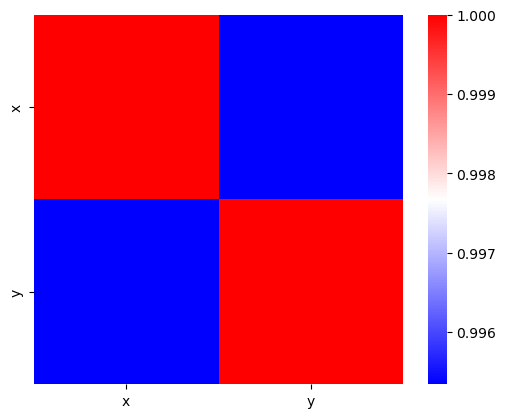

In [12]:
import seaborn as sns
correlations = train_data.corr()
sns.heatmap(data = correlations,square = True, cmap = "bwr")


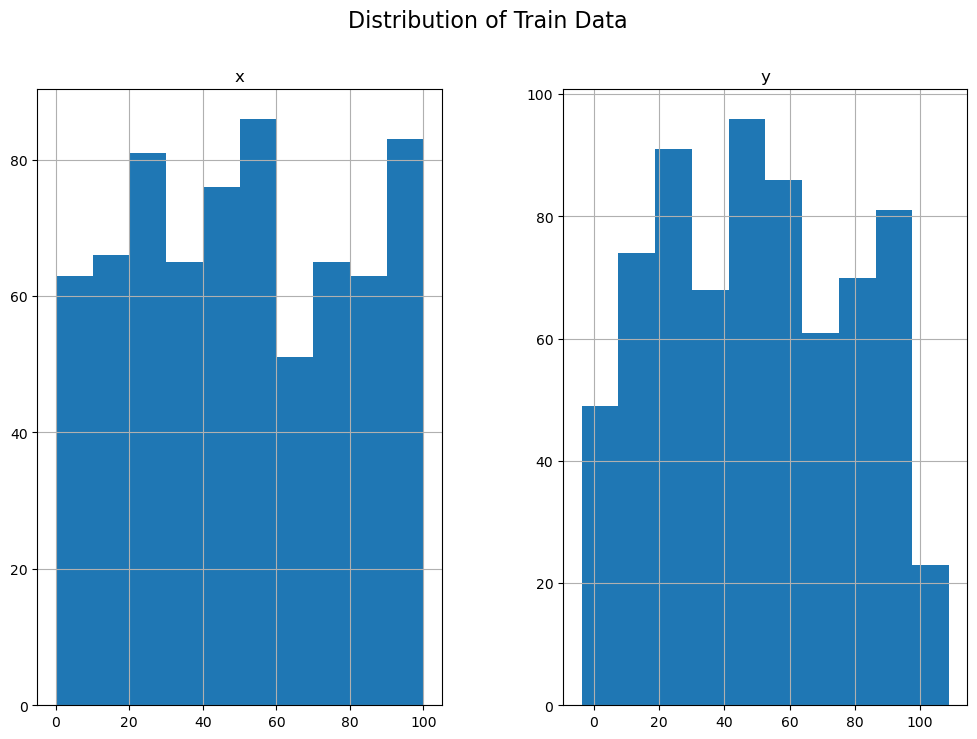

In [13]:
import matplotlib.pyplot as plt
def plot_histograms(train_data, title):
    train_data.hist(figsize=(12, 8))
    plt.suptitle(title, fontsize=16)
    plt.show()
plot_histograms(train_data, "Distribution of Train Data")


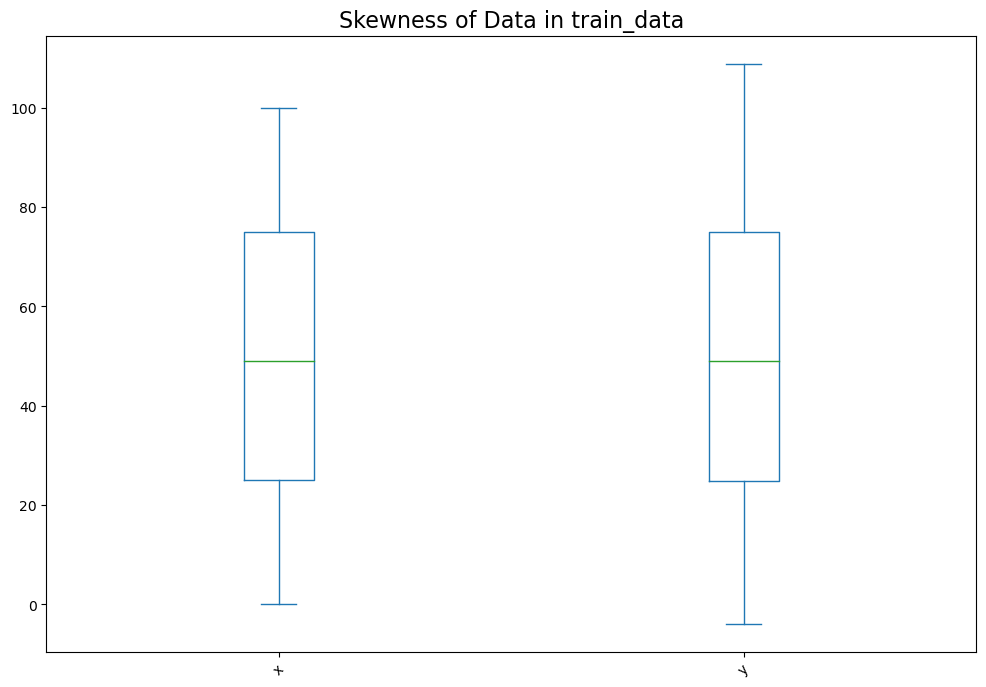

In [14]:
# Function to plot boxplots for numerical columns
def plot_boxplots(train_data, title):
    train_data.plot(kind='box', figsize=(12, 8))
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45)
    plt.show()

# Plot boxplots for tsla_split_adjusted
plot_boxplots(train_data, "Skewness of Data in train_data")


In [15]:
x=train_data['x']

In [16]:
y=train_data['y']

In [17]:
# Convert Pandas Series to NumPy arrays and reshape to 2D arrays
X = x.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)


In [18]:
# Scale features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [23]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [25]:
# Calculate evaluation metrics
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

In [26]:
# Print evaluation metrics
print("Training Set - Mean Squared Error (MSE):", mse_train)
print("Training Set - R-squared (R2):", r2_train)
print("Test Set - Mean Squared Error (MSE):", mse_test)
print("Test Set - R-squared (R2):", r2_test)

Training Set - Mean Squared Error (MSE): 7.898691873779142
Training Set - R-squared (R2): 0.9904718945424777
Test Set - Mean Squared Error (MSE): 7.752986666319177
Test Set - R-squared (R2): 0.9910998765243975


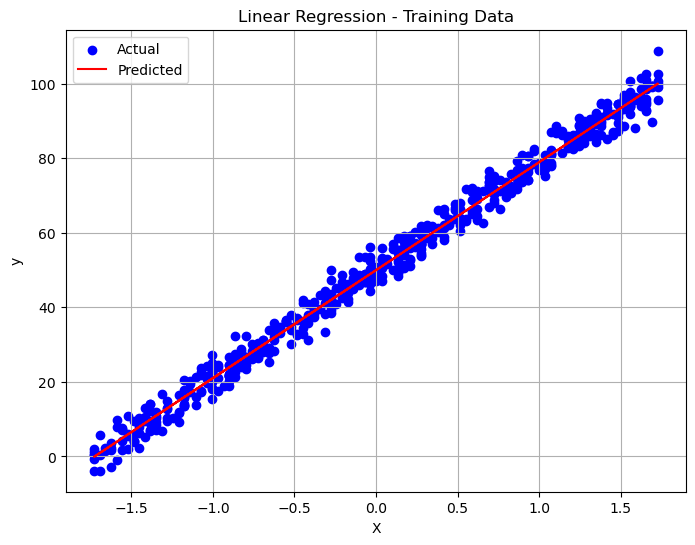

In [28]:
# Plotting the linear regression line on the training data
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='blue', label='Actual')  # Plotting actual data points
plt.plot(X_train, y_pred_train, color='red', label='Predicted')  # Plotting predicted values
# Adding labels and title
plt.title('Linear Regression - Training Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

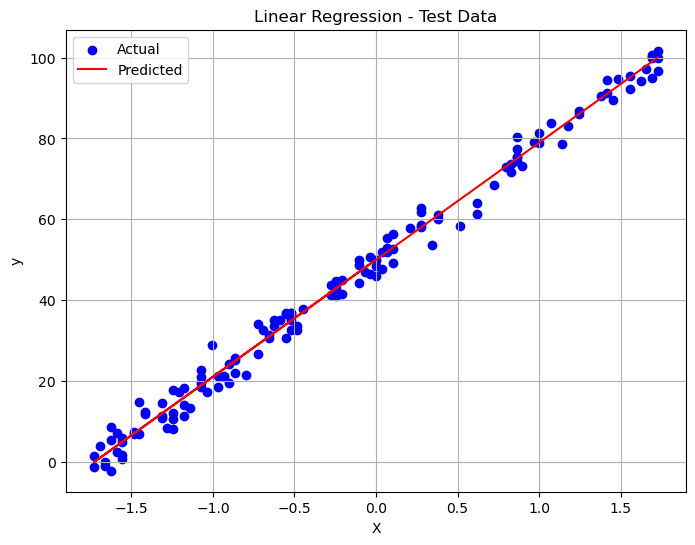

In [30]:
# Plotting the linear regression line on the test data
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')  # Plotting actual data points
plt.plot(X_test, y_pred_test, color='red', label='Predicted')  # Plotting predicted values
# Adding labels and title
plt.title('Linear Regression - Test Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
import joblib
objects_to_save={
    'model' : model
}
joblib.dump(objects_to_save, 'linearregressionmodel.pkl')

['linearregressionmodel.pkl']